**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# import data 2C_weka.csv for 2 Class Classifcation.


In [41]:
# Reading the data
df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

### Head and Tail

In [42]:
#display the first 5 rows - 5 is default
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [43]:
#display the last 5 rows - 5 is default
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


### Finding Missing Values

In [58]:
#checking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [59]:
#checking for any null/missing values in the dataset 
df.isnull().any().sum()

0

### Checking for unique values of the columns

In [45]:
for col in list(df):
    print(col)
    print(df[col].unique())
    print("----------------------------------------------------------------------")

pelvic_incidence
[ 63.0278175   39.05695098  68.83202098  69.29700807  49.71285934
  40.25019968  53.43292815  45.36675362  43.79019026  36.68635286
  49.70660953  31.23238734  48.91555137  53.5721702   57.30022656
  44.31890674  63.83498162  31.27601184  38.69791243  41.72996308
  43.92283983  54.91944259  63.07361096  45.54078988  36.12568347
  54.12492019  26.14792141  43.58096394  44.5510115   66.87921138
  50.81926781  46.39026008  44.93667457  38.66325708  59.59554032
  31.48421834  32.09098679  35.70345781  55.84328595  52.41938511
  35.49244617  46.44207842  53.85479842  66.28539377  56.03021778
  50.91244034  48.332638    41.35250407  40.55735663  41.76773173
  55.28585178  74.43359316  50.20966979  30.14993632  41.17167989
  47.65772963  43.34960621  46.85578065  43.20318499  48.10923638
  74.37767772  89.68056731  44.529051    77.69057712  76.1472121
  83.93300857  78.49173027  75.64973136  72.07627839  58.59952852
  72.56070163  86.90079431  84.97413208  55.512212    72.222

In [50]:
#finding the unique values of class column
df["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

### Distribution of data depending on the class

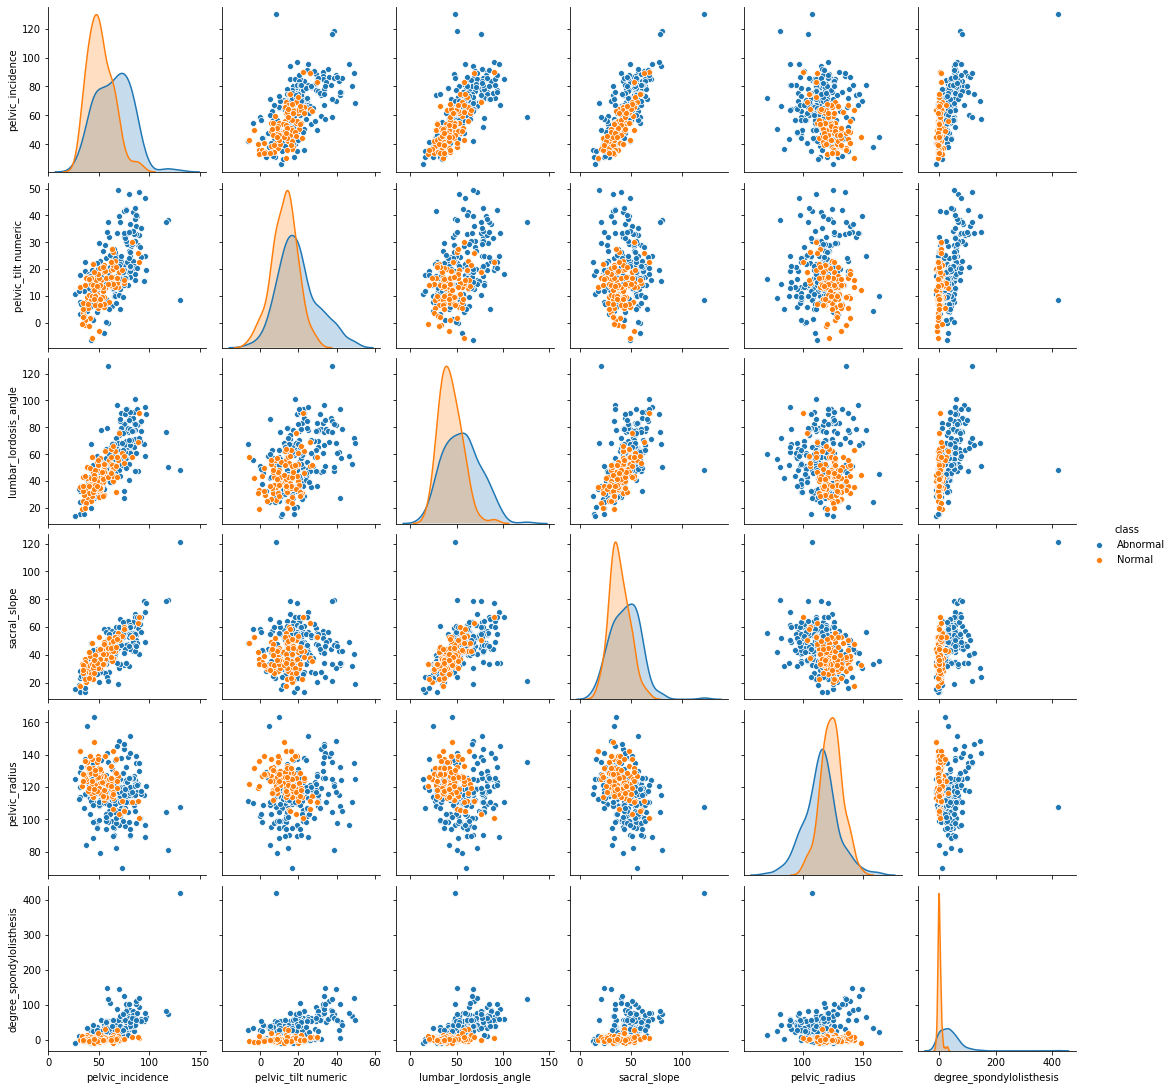

In [60]:
#displaying pairplot for analyzing the data
sns.pairplot(df, hue="class")

### Type of data

In [61]:
#data types of all columns
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

### Distribution of different classes for pelvic_radius and sacral_slope for visualization


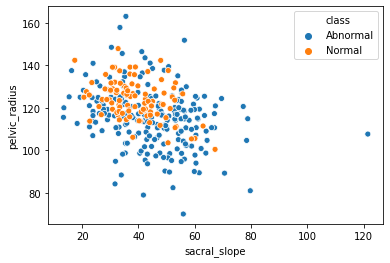

In [62]:
sns.scatterplot(data=df, x="sacral_slope", y="pelvic_radius", hue="class")

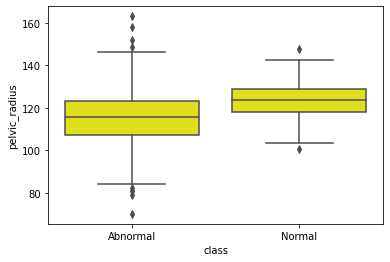

In [63]:
sns.boxplot(x="class", y="pelvic_radius", data=df,color='yellow')

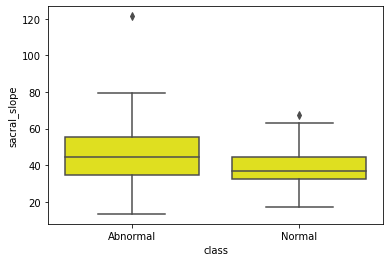

In [64]:
sns.boxplot(x="class", y="sacral_slope", data=df,color='yellow')

### Encode the Class variable to integer.

In [65]:
df['class'] = df['class'].replace({'Normal': 0,'Abnormal':1})
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [66]:
X = df.drop("class", axis=1)

In [67]:
y = df["class"]

# Normalize your Data (X) to get values between 0 to 1.

In [68]:
df_z = df.apply(zscore)  # convert all attributes to Z scale 
df_z.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17,1.136009e-15
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01,-1.449138e+00
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01,-1.449138e+00
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01,6.900656e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01,6.900656e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01,6.900656e-01


In [70]:
#Since we have to consider the scaled data for model building
X = df_z.drop("class", axis=1)

# Split the dat as train and test with a ratio of 70:30.

In [71]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [72]:
#KNN model
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
#look for 5 nearest neighbors
#weights is based on distance calculation

In [73]:
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [74]:
KNN.score(X_test, y_test)

0.7849462365591398

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [25]:
KNN = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [26]:
KNN = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [27]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7741935483870968

In [28]:
KNN = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7634408602150538

In [29]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7849462365591398

In [30]:
KNN = KNeighborsClassifier(n_neighbors= 6 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7849462365591398

In [31]:
KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7849462365591398

In [32]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7956989247311828

In [33]:
KNN = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7849462365591398

In [ ]:
# for K = 8 we have the highest accuracy of 78%

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [75]:
# Reading the data
df = pd.read_csv('3Classdata.csv')

### Head and Tail

In [76]:
#display the first 5 rows - 5 is default
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [77]:
#display the last 5 rows - 5 is default
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


### Finding Missing Values

In [78]:
#checking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [79]:
#checking for any null/missing values in the dataset 
df.isnull().any().sum()

0

### Checking for unique values of the columns


In [80]:
for col in list(df):
    print(col)
    print(df[col].unique())
    print("----------------------------------------------------------------------")

pelvic_incidence
[ 63.0278175   39.05695098  68.83202098  69.29700807  49.71285934
  40.25019968  53.43292815  45.36675362  43.79019026  36.68635286
  49.70660953  31.23238734  48.91555137  53.5721702   57.30022656
  44.31890674  63.83498162  31.27601184  38.69791243  41.72996308
  43.92283983  54.91944259  63.07361096  45.54078988  36.12568347
  54.12492019  26.14792141  43.58096394  44.5510115   66.87921138
  50.81926781  46.39026008  44.93667457  38.66325708  59.59554032
  31.48421834  32.09098679  35.70345781  55.84328595  52.41938511
  35.49244617  46.44207842  53.85479842  66.28539377  56.03021778
  50.91244034  48.332638    41.35250407  40.55735663  41.76773173
  55.28585178  74.43359316  50.20966979  30.14993632  41.17167989
  47.65772963  43.34960621  46.85578065  43.20318499  48.10923638
  74.37767772  89.68056731  44.529051    77.69057712  76.1472121
  83.93300857  78.49173027  75.64973136  72.07627839  58.59952852
  72.56070163  86.90079431  84.97413208  55.512212    72.222

In [81]:
#finding the unique values of class column
df["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

### Distribution of data depending on the class

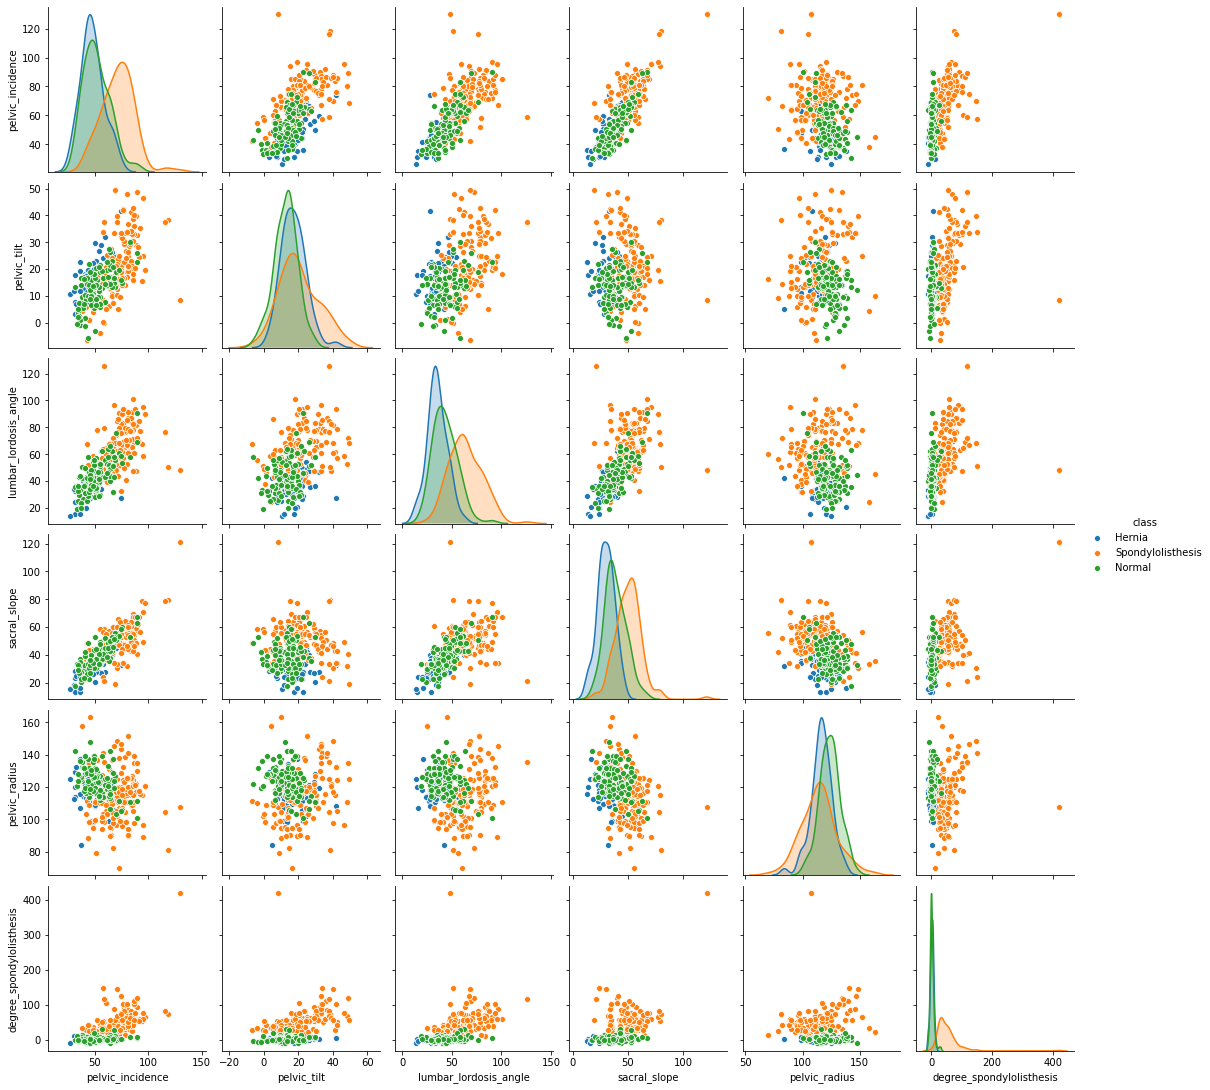

In [82]:
#displaying pairplot for analyzing the data
sns.pairplot(df, hue="class")

### Type of data

In [83]:
#data types of all columns
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

### Distribution of different classes for pelvic_radius and sacral_slope for visualization

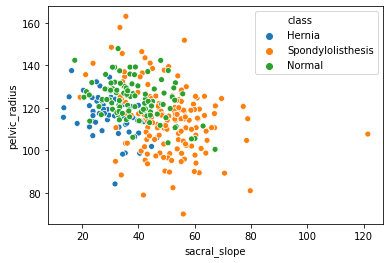

In [84]:
sns.scatterplot(data=df, x="sacral_slope", y="pelvic_radius", hue="class")

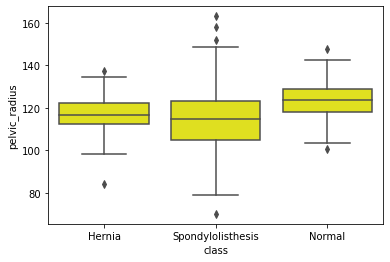

In [85]:
sns.boxplot(x="class", y="pelvic_radius", data=df,color='yellow')

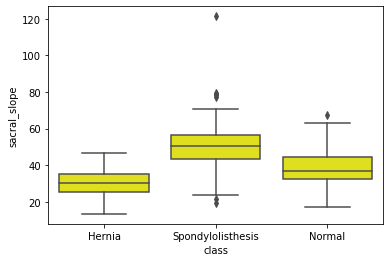

In [86]:
sns.boxplot(x="class", y="sacral_slope", data=df,color='yellow')

### Encode the Class variable to integer.

In [91]:
df['class'] = df['class'].replace({'Hernia': 0,'Spondylolisthesis':1, 'Normal':2})
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,2
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,2
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,2
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,2


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [92]:
X = df.drop("class", axis=1)

In [93]:
y = df["class"]

# Normalize your Data (X) to get values between 0 to 1.

In [94]:
df_z = df.apply(zscore)  # convert all attributes to Z scale 
df_z.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17,1.786385e-15
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01,-1.597524e+00
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01,-1.825742e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01,-1.825742e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01,1.232376e+00
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01,1.232376e+00


In [95]:
#Since we have to consider the scaled data for model building
X = df_z.drop("class", axis=1)

# Split the dat as train and test with a ratio of 70:30.

In [96]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [97]:
#KNN model
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
#look for 5 nearest neighbors
#weights is based on distance calculation

In [98]:
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

# Calculate the performance score of of your classification on test dataset.

In [99]:
KNN.score(X_test, y_test)

0.7526881720430108

# What is the best K value for your classifcation?

In [101]:
KNN = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.6989247311827957

In [102]:
KNN = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.6989247311827957

In [103]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [104]:
KNN = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7204301075268817

In [105]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7526881720430108

In [106]:
KNN = KNeighborsClassifier(n_neighbors= 6 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [107]:
KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [108]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7526881720430108

In [109]:
KNN = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7419354838709677

In [110]:
# for K = 5 and 8 we have the highest accuracy of 74%